## Cats vs Dogs

In [35]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from PIL import Image as Img
import cv2
import glob


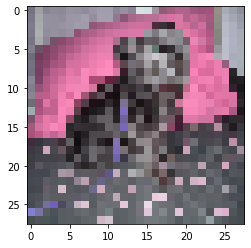

In [20]:
img1 = mpimg.imread("data/PetImages/Dog/0.jpg")
img1S = cv2.resize(img1, (28, 28))
plt.imshow(img1S)

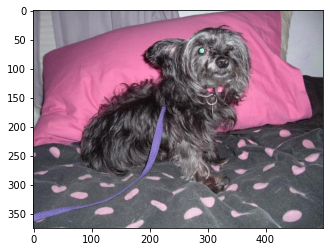

In [9]:
plt.imshow(img1)

In [24]:
def rgbToGray(img):
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return imgGray

In [99]:
def organize_data(file_name):
    img = mpimg.imread(file_name)
    # resize image
    img = cv2.resize(img, (280, 280))
    # change image color to gray
    img = rgbToGray(img)
    return img

In [102]:
dog_images = glob.glob("./data/PetImages/dog_test/*.jpg")
for dog_img in dog_images:
    img = organize_data(dog_img)
    # plt.imshow(img, cmap='gray')
    # plt.show()

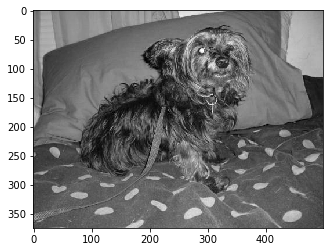

In [27]:
plt.imshow(img1[:,:,1], cmap='gray', vmin = 0, vmax = 255,interpolation='none')

In [28]:
# def resize(img):
    

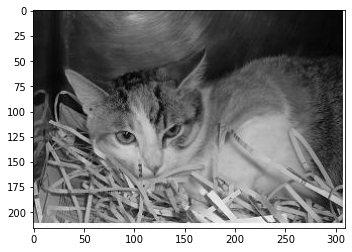

In [65]:
plt.imshow(rgbToGray(img1), cmap='gray')

In [ ]:
for cat_img in cat_images:
    

In [32]:

# img = img.resize((160, 240), Image.ANTIALIAS)
# img.size

In [33]:
# import cv2

# originalImage = cv2.imread("PATH/TO/IMG")
# grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)

In [ ]:
from IPython.display import JSON, HTML
display(JSON({'name': 'NAME', 'age': 23}))
display(HTML("<h1>Header</h1><h3>Footer</h3>"))